- 检查模型的训练得好不好

1. plot Q curve
2. check training loss and val loss

In [2]:
import sys
import os
home = os.path.expanduser("~")
sys.path.append(f'{home}/TorchFiber')
import pickle, matplotlib.pyplot as plt, numpy as np, os
from src.TorchDSP.dataloader import get_Qsq, getQsq_fromdir, mean_peak
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['g',  'b', 'k', 'y', 'm', 'c'])  # type: ignore

discard = 10000
i,j = 2, 0

Q1,Rs,Nch,P = get_Qsq('../outputs/Qfactor/Q2000/baselines.pkl', discard=discard)
cdc = Q1['CDC'][i, j,:]
Q, Rs, Nch, P = getQsq_fromdir('../outputs/Qfactor_1205/Q2000/few_test/', discard=discard)


sqz = lambda x: np.squeeze(x) if (x.shape[0]!=4) else x[i,j]

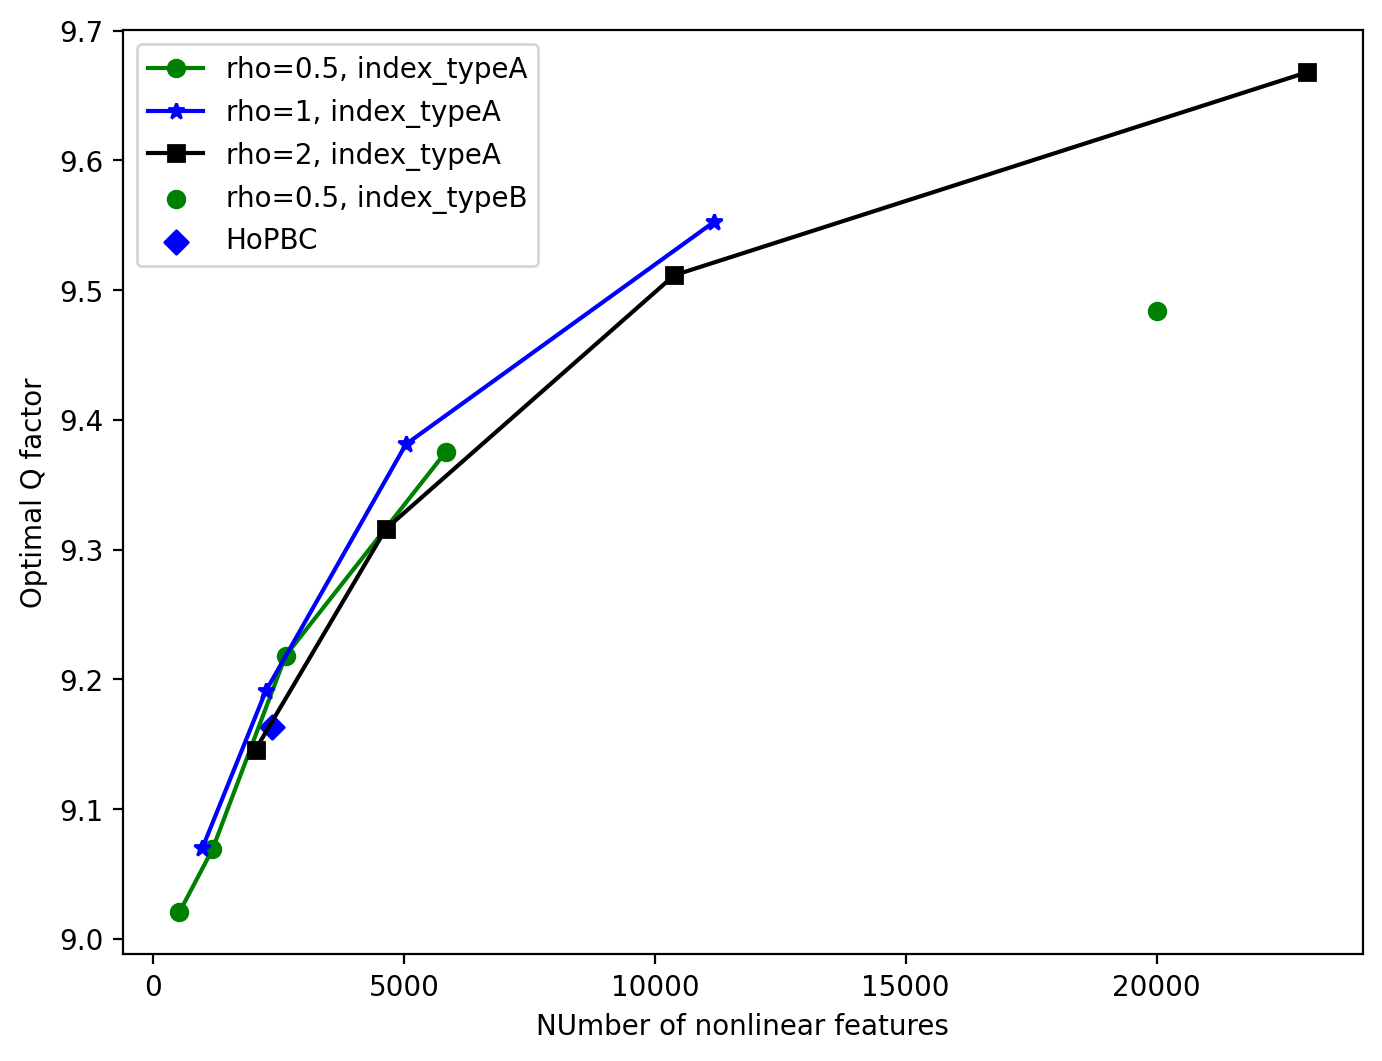

In [3]:
plt.figure(figsize=(8,6), dpi=200)
# rho=0.5, wdk=0.001, epochs=2000, lossMT, index_typeA
CC = []
Qmax = []
for L in [100, 200, 400, 800]:
    key = f'models/SymFoPBC/L{L}_rho0.5_index_typeA_lossMT_batchs19_tbpl5000_iters1_lr1e-4_wdk0.001_epochs2000'
    rho = 0.5
    CC.append(2*rho*L*np.log(rho * L/2) + 2*L)
    Qmax.append(np.max(Q[key]))
# plt.scatter(CC, Qmax, label='rho=0.5')
plt.plot(CC, Qmax, '-o', label='rho=0.5, index_typeA')

# # rho=1, wdk=0.001, epochs=2000, lossMT, index_typeA
# for key in  Q.keys():
#     if 'SymFoPBC' in key and 'rho1' in key and 'epochs50' in key and 'lossMT' in key and 'index_typeA' in key:
#         keys.append(key)

CC = []
Qmax = []
for L in [100, 200, 400, 800]:
    key = f'models/SymFoPBC/L{L}_rho1_index_typeA_lossMT_batchs18_tbpl5000_discard2000_iters1_lr1e-4_wdk0.001_lamb0_epochs50'
    rho = 1
    CC.append(2*rho*L*np.log(rho * L/2) + 2*L)
    Qmax.append(np.max(Q[key]))
# plt.scatter(CC, Qmax, label='rho=1')
plt.plot(CC, Qmax, '-*', label='rho=1, index_typeA')

# for key in  Q.keys():
#     if 'SymFoPBC/L800' in key and 'rho2' in key and 'epochs50' in key and 'lossMT' in key and 'index_typeA' in key:
#         keys.append(key)

CC = []
Qmax = []
for L in [100, 200, 400, 800]:
    key = f'models/SymFoPBC/L{L}_rho2_index_typeA_lossMT_batchs18_tbpl5000_discard2000_iters1_lr1e-4_wdk0.001_lamb0_epochs50'
    rho = 2
    CC.append(2*rho*L*np.log(rho * L/2) + 2*L)
    Qmax.append(np.max(Q[key]))
# plt.scatter(CC, Qmax, label='rho=2')
plt.plot(CC, Qmax, '-s', label='rho=2, index_typeA')



key =  'models/SymFoPBC/L200_rho0.5_index_typeB_lossMT_batchs18_tbpl5000_discard2000_iters1_lr1e-4_wdk0.001_lamb0_epochs100'
CC = 1/2*200**2
Qmax = np.max(Q[key])
plt.scatter(CC, Qmax, label='rho=0.5, index_typeB')


import torch
ckpt = torch.load('../models/SymHoPBC/L200_rho0.5_steps2_lossMT_batchs18_tbpl5000_discard2000_iters1_lr2e-4_wdk0.001_lamb0_epochs400/Nch1_Rs80.pth.ckpt400', map_location='cpu')
L = 200
rho = 0.5
CC = (2*rho*L*np.log(rho * L/2) + 2*L)*2
Qmax = np.max(ckpt['metric']['Qsq'])
plt.scatter(CC, Qmax, marker='D', label='HoPBC')

plt.xlabel('NUmber of nonlinear features')
plt.ylabel('Optimal Q factor')
plt.legend()

# 1. SymFoPBC:  batchs, epochs.

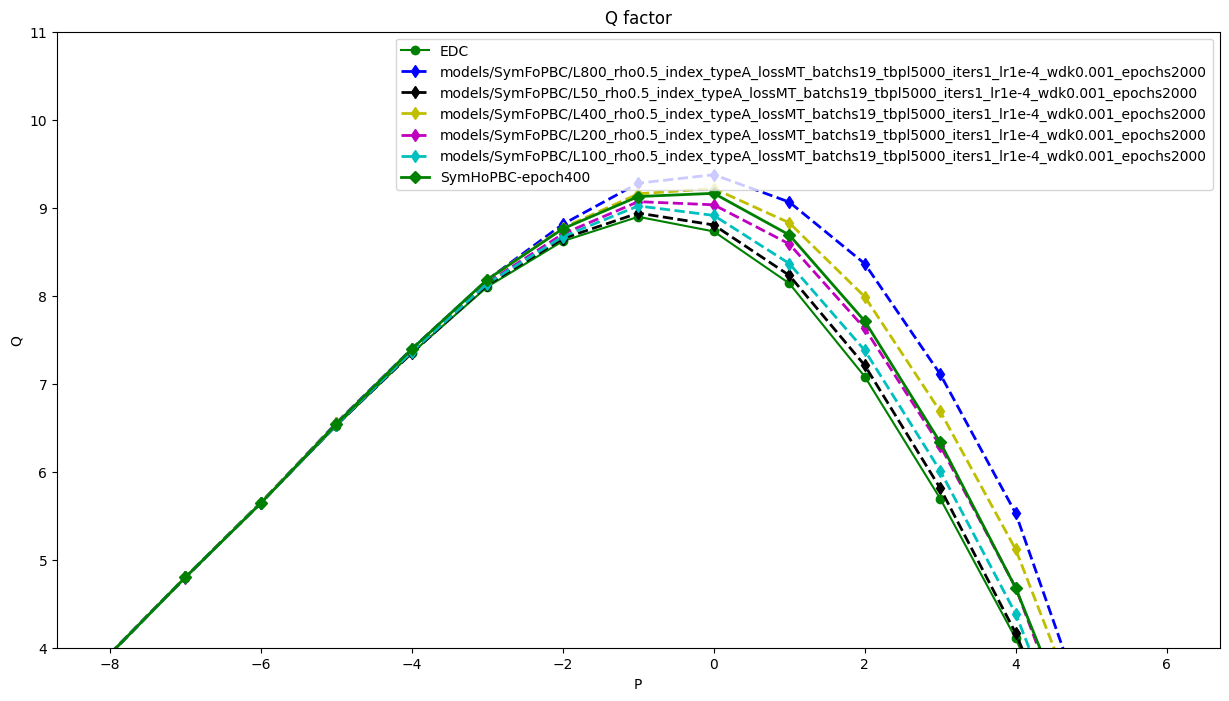

In [71]:
plt.figure(figsize=(15,8), dpi=100)
plt.plot(P, cdc, '-o', label='EDC')

# rho=0.5, wdk=0.001, epochs=2000, lossMT, index_typeA
for key in  Q.keys():
    if 'SymFoPBC' in key and 'rho0.5' in key and 'wdk0.001' in key and 'epochs2000' in key and 'lossMT' in key and 'index_typeA' in key:
        plt.plot(P, sqz(Q[key]), '--d', linewidth=2, label=key)

# # rho=1, wdk=0.001, epochs=2000, lossMT, index_typeA
# for key in  Q.keys():
#     if 'SymFoPBC/L800' in key and 'rho1' in key and 'epochs50' in key and 'lossMT' in key and 'index_typeA' in key:
#         plt.plot(P, sqz(Q[key]), '--*', linewidth=2, label=key)

# for key in  Q.keys():
#     if 'SymFoPBC/L800' in key and 'rho2' in key and 'epochs50' in key and 'lossMT' in key and 'index_typeA' in key:
#         plt.plot(P, sqz(Q[key]), '--s', linewidth=2, label=key)

# # rho=0.5, wdk=0.001, epochs=2000, lossMT, index_typeB
# for key in  Q.keys():
#     if 'SymFoPBC' in key and 'index_typeB' in key and 'epochs100' in key:
#         plt.plot(P, sqz(Q[key]), '-*', linewidth=2, label=key)

# # rho=0.5, wdk=0.001, epochs=2000, lossMT, index_typeA
# for key in  Q.keys():
#     if 'SymFoPBC/L200' in key and 'rho0.5' in key and 'wdk0.001' in key and 'epochs1' in key and 'lossMT' in key and 'index_typeB' in key:
#         plt.plot(P, sqz(Q[key]), '-d', linewidth=2, label=key)

import torch
ckpt = torch.load('../models/SymHoPBC/L200_rho0.5_steps2_lossMT_batchs18_tbpl5000_discard2000_iters1_lr2e-4_wdk0.001_lamb0_epochs400/Nch1_Rs80.pth.ckpt400', map_location='cpu')
plt.plot(P, ckpt['metric']['Qsq'], '-D', linewidth=2, label='SymHoPBC-epoch400')

# import torch
# ckpt = torch.load('models/SymFoPBC/L800_rho2_index_typeA_lossMT_batchs18_tbpl5000_discard2000_iters1_lr1e-4_wdk0.01_lamb0_epochs100/Nch1_Rs80.pth.ckpt100', map_location='cpu')
# plt.plot(P, ckpt['metric']['Qsq'], '-D', linewidth=2, label='L800_rho2_index_typeA_lossMT_batchs18_tbpl5000_discard2000_iters1_lr1e-4_wdk0.01_lamb0_epochs100')


plt.title('Q factor')
plt.xlabel('P')
plt.ylabel('Q')
plt.ylim(4, 11)
plt.legend()

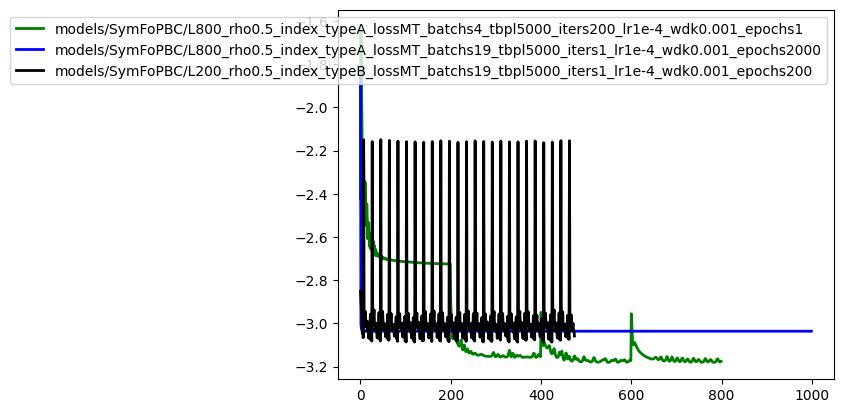

In [9]:
import torch
for key in  Q.keys():
    if 'SymFoPBC' in key and 'rho0.5' in key and 'wdk0.001' in key and 'epochs2000' in key and 'L800' in key:
    # if 'SymFoPBC' in key and 'L20' in key and 'wdk0.001' in key and 'lossMT' in key:
        dic = torch.load(f'../{key}/Nch1_Rs80.pth', map_location='cpu')
        plt.plot(dic['loss'][1::19*2], label=f'{key}', linewidth=2)

   
    if 'SymFoPBC' in key and 'rho0.5' in key and 'wdk0.001' in key and 'epochs1' in key and 'lossMT' in key and 'index_typeA' in key and 'L800' in key:
        dic = torch.load(f'../{key}/Nch1_Rs80.pth', map_location='cpu')
        plt.plot(dic['loss'], label=f'{key}', linewidth=2)

    if 'SymFoPBC' in key and 'rho0.5' in key and 'wdk0.001' in key and 'epochs200' in key and 'lossMT' in key and 'index_typeB' in key:
        dic = torch.load(f'../{key}/Nch1_Rs80.pth', map_location='cpu')
        plt.plot(dic['loss'][1::8], label=f'{key}', linewidth=2)

plt.legend()

# 2. SoPBC

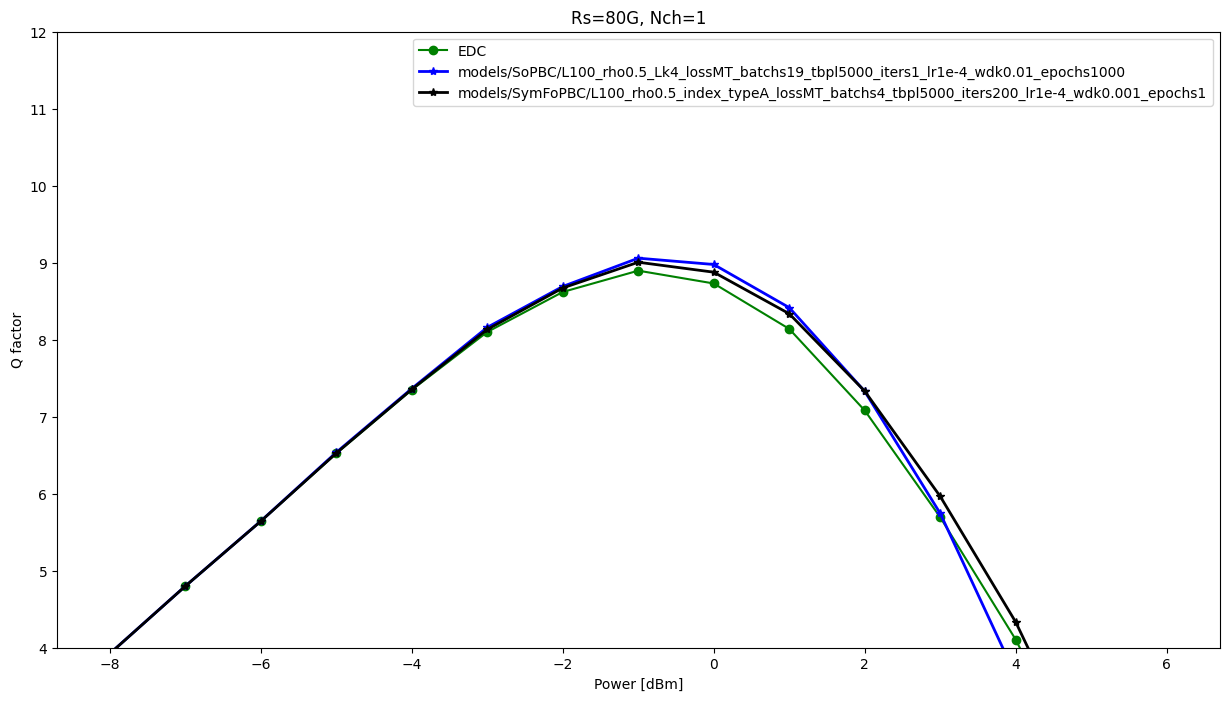

In [62]:
import sys
sys.path.append('/home/xiaoxinyu/TorchFiber')
import pickle, matplotlib.pyplot as plt, numpy as np, os
from src.TorchDSP.dataloader import get_Qsq, getQsq_fromdir, mean_peak
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['g',  'b', 'k', 'y', 'm', 'c'])  # type: ignore

discard = 10000
i,j = 2, 0

Q1,Rs,Nch,P = get_Qsq('../outputs/Qfactor/Q2000/baselines.pkl', discard=discard)
cdc = Q1['CDC'][i, j,:]
Q, Rs, Nch, P = getQsq_fromdir('../outputs/Qfactor_1205/Q2000/few_test/', discard=discard)


plt.figure(figsize=(15,8), dpi=100)
plt.plot(P, cdc, '-o', label='EDC')
# for key in  Q.keys():
#     if 'SoPBC' in key and 'batchs10' in key:
#         plt.plot(P, Q[key][i,j,:], '-*', linewidth=2, label=key)

for key in  Q.keys():
    if 'SoPBC' in key and 'epochs1000' in key and 'Lk4' in key:
        plt.plot(P, np.squeeze(Q[key]), '-*', linewidth=2, label=key)

for key in  Q.keys():
    if 'SymFoPBC/L100' in key and 'rho0.5' in key and 'wdk0.001' in key and 'epochs1' in key and 'lossMT' in key and 'index_typeA' in key:
        plt.plot(P, Q[key][i,j,:], '-*', linewidth=2, label=key)




plt.xlabel('Power [dBm]')
plt.ylabel('Q factor')
plt.title(f'Rs={int(Rs[i])}G, Nch={int(Nch[j])}')
plt.ylim(4,12)
plt.legend()

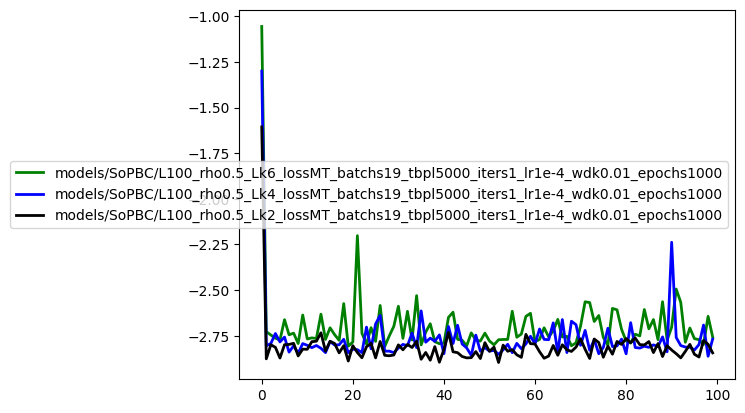

In [12]:
import torch
for key in  Q.keys():
    # if 'SoPBC' in key and 'batchs10' in key and 'Lk2' in key and 'lossMT' in key:
    #     dic = torch.load(f'../{key}/Nch1_Rs80.pth', map_location='cpu')
    #     plt.plot(dic['loss'], label=f'{key}', linewidth=2)

    if 'SoPBC' in key and 'epochs1000' in key  and 'lossMT' in key:
        dic = torch.load(f'../{key}/Nch1_Rs80.pth', map_location='cpu')
        plt.plot(dic['loss'][1::19*10], label=f'{key}', linewidth=2)

plt.legend()

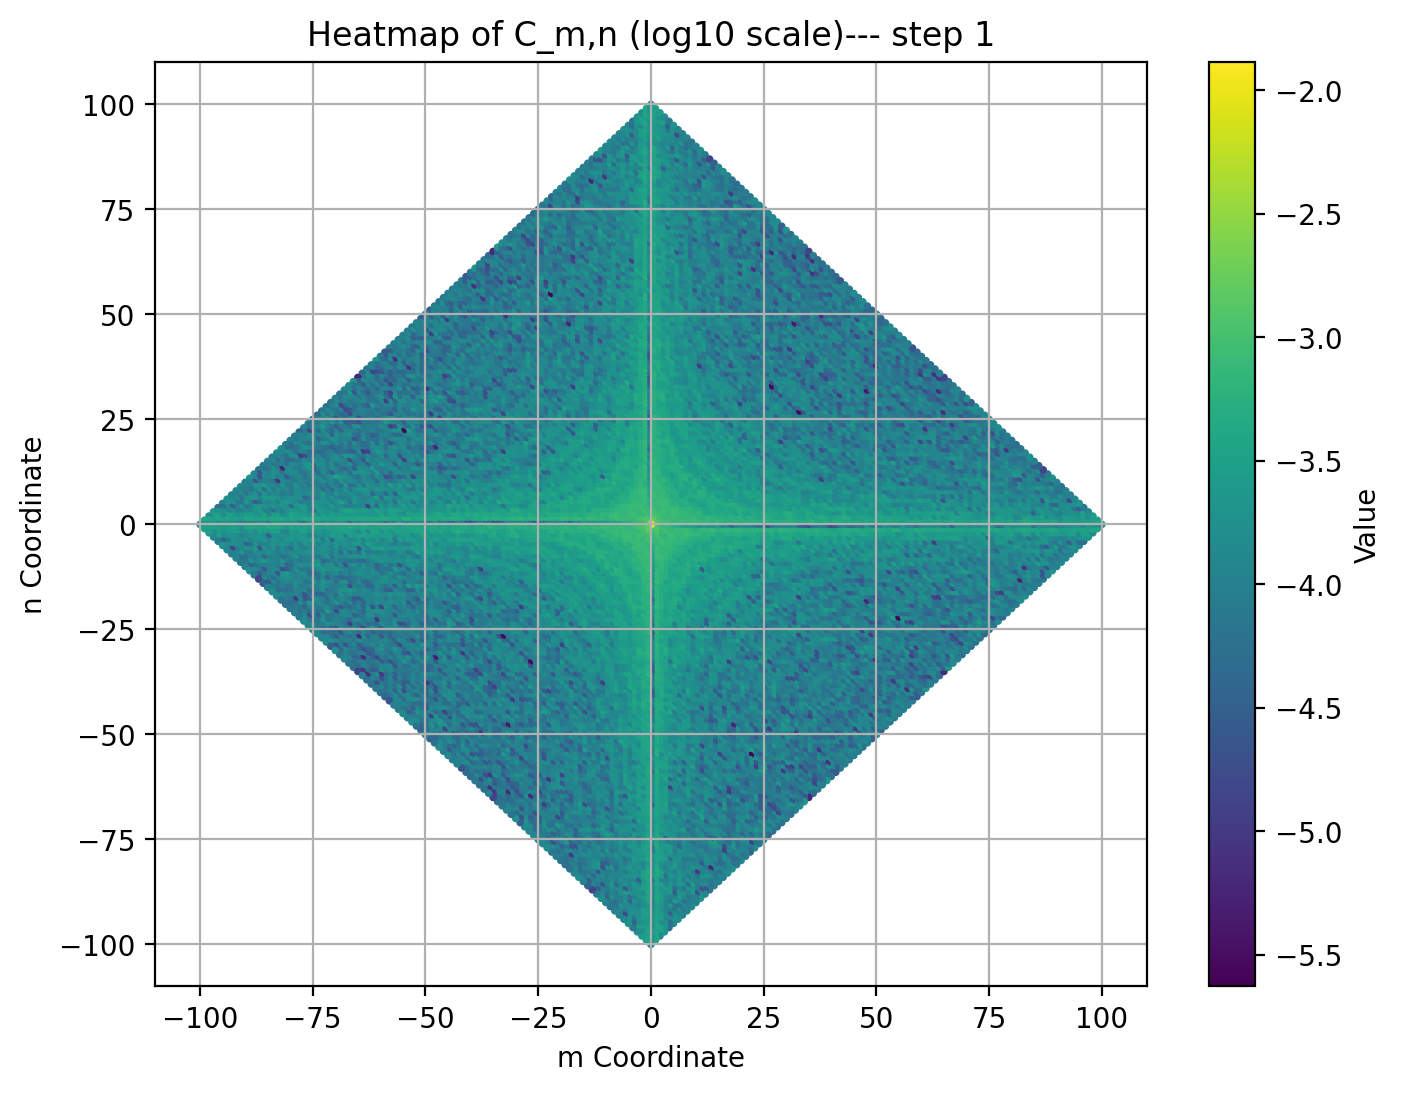

In [14]:
import torch, numpy as np, matplotlib.pyplot as plt
from src.TorchDSP.pbc import models
from src.TorchDSP.nneq import PBCNN

dic = torch.load('../models/SymFoPBC/L200_rho0.5_index_typeB_lossMT_batchs19_tbpl5000_iters1_lr1e-4_wdk0.001_epochs200/Nch1_Rs80.pth', map_location='cpu')
# dic = torch.load('../models/SymFoPBC/L200_rho2_index_typeA_lossMT_batchs18_tbpl5000_discard2000_iters1_lr1e-4_wdk0.001_lamb0_epochs50/Nch1_Rs80.pth', map_location='cpu')

model = models[dic['model_name']](**dic['model info'])
model.load_state_dict(dic['model'])

plt.figure(figsize=(8,6), dpi=200)
X = model.show_coeff()
# plt.savefig('coeff_B.png')

# 3. HoPBC

In [9]:
for key in  Q.keys():
    if 'SymHoPBC' in key and  'epochs200' in key:
        plt.plot(P, np.squeeze(Q[key]), '-*', linewidth=2, label=key)

(1, 5101)

# 4. training model result

In [36]:
import torch 
from src.TorchDSP.pbc import models

dic = torch.load('../_models/SymHoPBC_L200_rho1_steps2_Nch1_Rs80_Adagrad_lr1e-3.ckpt190', map_location='cpu')

model = models[dic['model_name']](**dic['model info'])

(4.0, 10.0)

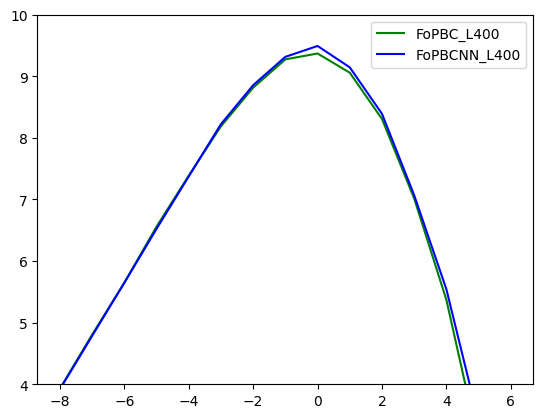

In [42]:
# dic = torch.load('../_models/SymHoPBC_L200_rho1_steps2_Nch1_Rs80_Adagrad_lr1e-3.ckpt200', map_location='cpu')
# plt.plot(P, dic['metric']['Qsq'], label='HoPBC_L200_step2')


# dic = torch.load('../_models/SymHoPBC_L400_rho1_steps2_Nch1_Rs80_Adagrad_lr1e-3.ckpt120', map_location='cpu')
# plt.plot(P, dic['metric']['Qsq'], label='HoPBC_L400_step2')

# dic = torch.load('../_models/SymFoPBC_L800_rho1_index_typeA_Nch1_Rs80.ckpt10', map_location='cpu')
# plt.plot(P, dic['metric']['Qsq'], label='FoPBC_L800')

dic = torch.load('../_models/SymFoPBC_L400_rho1_index_typeA_Nch1_Rs80_train1.ckpt50', map_location='cpu')
plt.plot(P, dic['metric']['Qsq'], label='FoPBC_L400')

dic = torch.load('../_models/SymFoPBCNN_L400_rho1_index_typeA_Nch1_Rs80_train8(H=200).ckpt200', map_location='cpu')
plt.plot(P, dic['metric']['Qsq'], label='FoPBCNN_L400')


plt.legend()
plt.ylim(4, 10)

(4.0, 10.0)

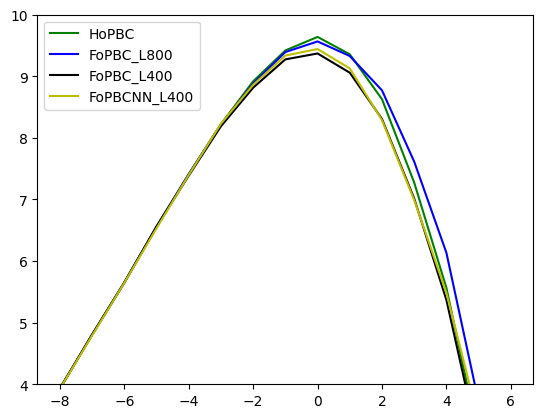

In [44]:
dic = torch.load('../_models/SymHoPBC_L400_rho1_steps2_Nch1_Rs80_Adagrad_lr1e-3.ckpt120', map_location='cpu')
plt.plot(P, dic['metric']['Qsq'], label='HoPBC')

dic = torch.load('../_models/SymFoPBC_L800_rho1_index_typeA_Nch1_Rs80.ckpt10', map_location='cpu')
plt.plot(P, dic['metric']['Qsq'], label='FoPBC_L800')

dic = torch.load('../_models/SymFoPBC_L400_rho1_index_typeA_Nch1_Rs80_train1.ckpt50', map_location='cpu')
plt.plot(P, dic['metric']['Qsq'], label='FoPBC_L400')

dic = torch.load('../_models/SymFoPBCNN_L400_rho1_index_typeA_Nch1_Rs80_train7(H=20).ckpt200', map_location='cpu')
plt.plot(P, dic['metric']['Qsq'], label='FoPBCNN_L400')


plt.legend()
plt.ylim(4, 10)

# Rs=20

(8.0, 12.0)

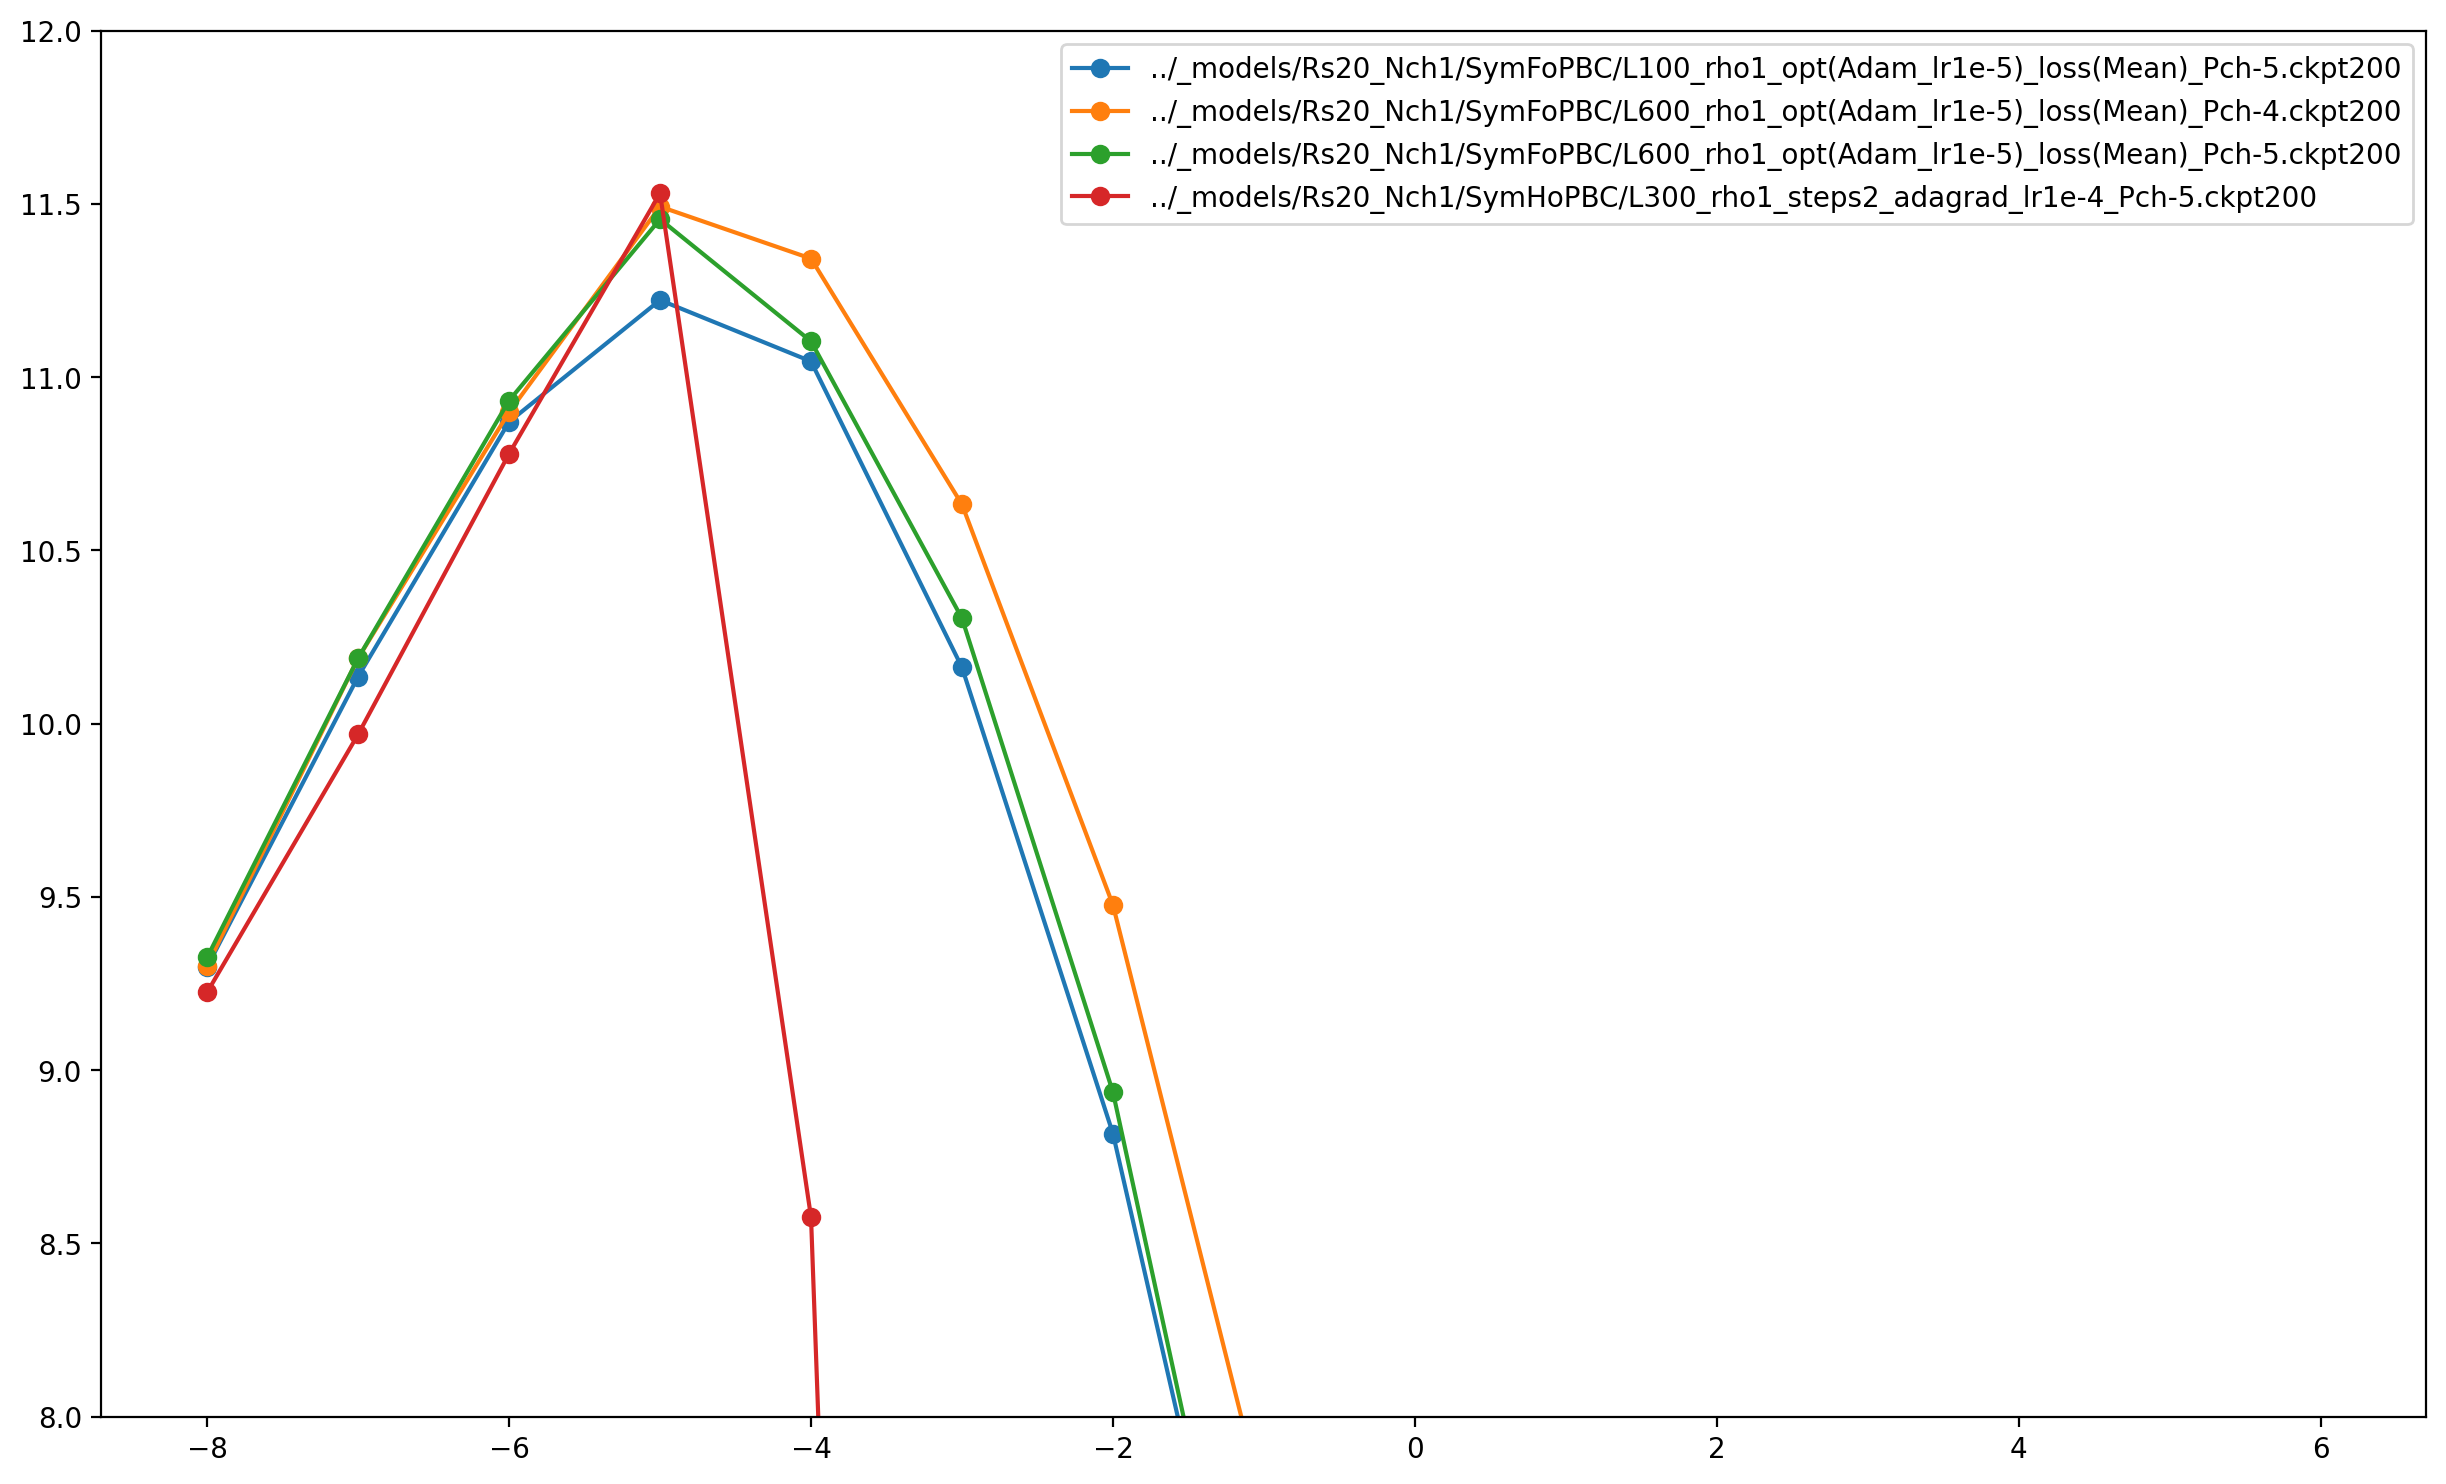

In [36]:
import torch, matplotlib.pyplot as plt, numpy as np
model_paths = [
    # '../_models/Rs20_Nch1/SymFoPBC/L100_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-8.ckpt200',
    # '../_models/Rs20_Nch1/SymFoPBC/L100_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-7.ckpt200',
    # '../_models/Rs20_Nch1/SymFoPBC/L100_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-6.ckpt200',
    '../_models/Rs20_Nch1/SymFoPBC/L100_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-5.ckpt200',
    # '../_models/Rs20_Nch1/SymFoPBC/L100_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-4.ckpt200',
    # '../_models/Rs20_Nch1/SymFoPBC/L100_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-3.ckpt200',
    # '../_models/Rs20_Nch1/SymFoPBC/L200_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-5.ckpt200',
    # '../_models/Rs20_Nch1/SymFoPBC/L400_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-5.ckpt200',
    '../_models/Rs20_Nch1/SymFoPBC/L600_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-4.ckpt200',
    '../_models/Rs20_Nch1/SymFoPBC/L600_rho1_opt(Adam_lr1e-5)_loss(Mean)_Pch-5.ckpt200',

    '../_models/Rs20_Nch1/SymHoPBC/L300_rho1_steps2_adagrad_lr1e-4_Pch-5.ckpt200',
]
P = np.arange(-8, 7)
plt.figure(figsize=(15,9), dpi=200)
for path in model_paths:
    dic = torch.load(path, map_location='cpu')
    plt.plot(P, dic['metric']['Qsq'], '-o', label=path)
plt.legend()
plt.ylim(8, 12)

# Rs=40

(2.0, 11.0)

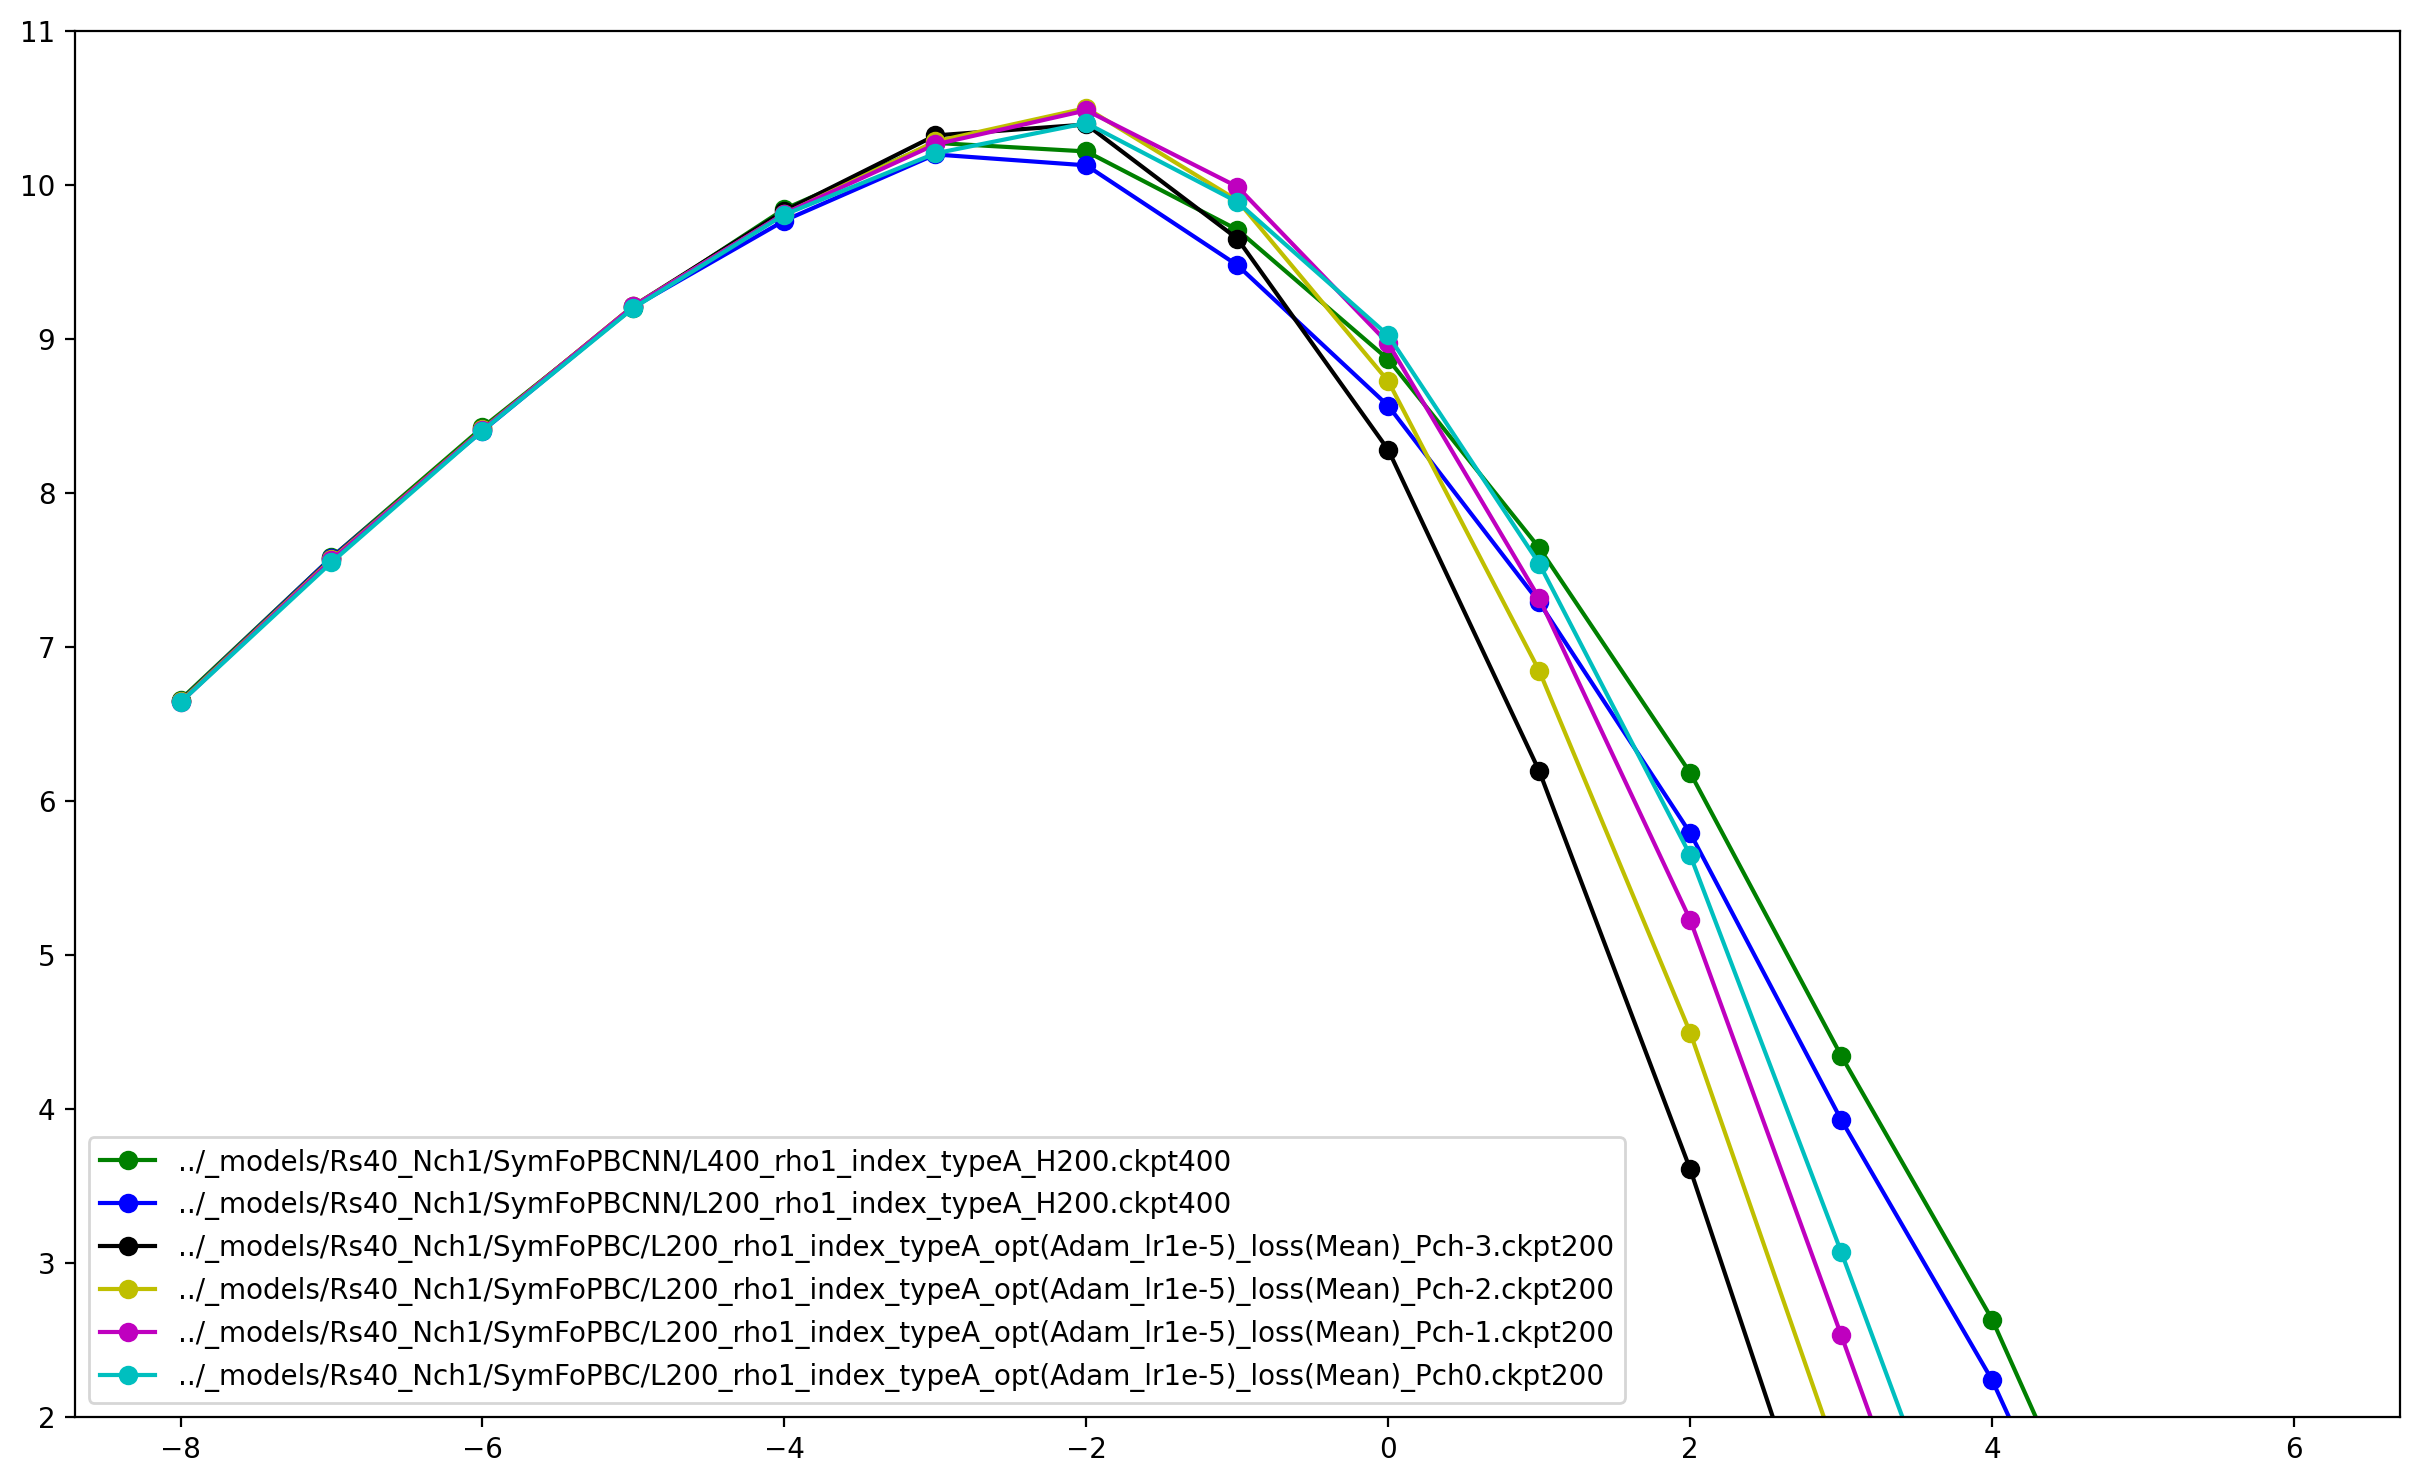

In [10]:
import torch, matplotlib.pyplot as plt
model_paths = [
    '../_models/Rs40_Nch1/SymFoPBCNN/L400_rho1_index_typeA_H200.ckpt400',
    '../_models/Rs40_Nch1/SymFoPBCNN/L200_rho1_index_typeA_H200.ckpt400',

    '../_models/Rs40_Nch1/SymFoPBC/L200_rho1_index_typeA_opt(Adam_lr1e-5)_loss(Mean)_Pch-3.ckpt200',
    '../_models/Rs40_Nch1/SymFoPBC/L200_rho1_index_typeA_opt(Adam_lr1e-5)_loss(Mean)_Pch-2.ckpt200',
    '../_models/Rs40_Nch1/SymFoPBC/L200_rho1_index_typeA_opt(Adam_lr1e-5)_loss(Mean)_Pch-1.ckpt200',
    '../_models/Rs40_Nch1/SymFoPBC/L200_rho1_index_typeA_opt(Adam_lr1e-5)_loss(Mean)_Pch0.ckpt200',

    # '../_models/SymFoPBCNN_L200_rho1_Nch1_Rs40_H200_Pch0.ckpt200', 
    # '../_models/SymFoPBCNN_L200_rho1_Nch1_Rs40_H200_Pch-1_init2.ckpt400',
    # '../_models/SymFoPBCNN_L200_rho1_Nch1_Rs40_H200_Pch-2.ckpt200', 


    # '../_models/SymHoPBC_L100_rho1_steps2_Nch1_Rs40_train1.ckpt200',
    # '../_models/SymFoPBC_L200_rho1_index_typeA_Nch1_Rs40_opt(SGD_lr1e-5_mmt0.9).ckpt200',
    # '../_models/SymFoPBC_L200_rho1_index_typeA_Nch1_Rs40_train1.ckpt200',
    # '../_models/SymFoPBCNN_L200_rho1_index_typeA_Nch1_Rs40_H200.ckpt200',

    # '../_models/SymHoPBC_L200_rho1_steps2_Nch1_Rs40_adagrad_lr1e-3_Pch-2.ckpt100',
    # '../_models/SymHoPBC_L100_rho1_steps2_Nch1_Rs40_adagrad_lr1e-3_Pch-3-3.ckpt100',
    # '../_models/SymHoPBC_L200_rho1_steps2_Nch1_Rs40_adagrad_lr1e-3_Pch-1.ckpt10',
    # '../_models/SymHoPBC_L200_rho1_steps2_Nch1_Rs40_adagrad_lr1e-3_Pch0.ckpt180'
]

plt.figure(figsize=(15,9), dpi=200)
for path in model_paths:
    dic = torch.load(path, map_location='cpu')
    plt.plot(P, dic['metric']['Qsq'], '-o', label=path)
plt.legend()
plt.ylim(2, 11)

# Rs = 80

(6.0, 10.0)

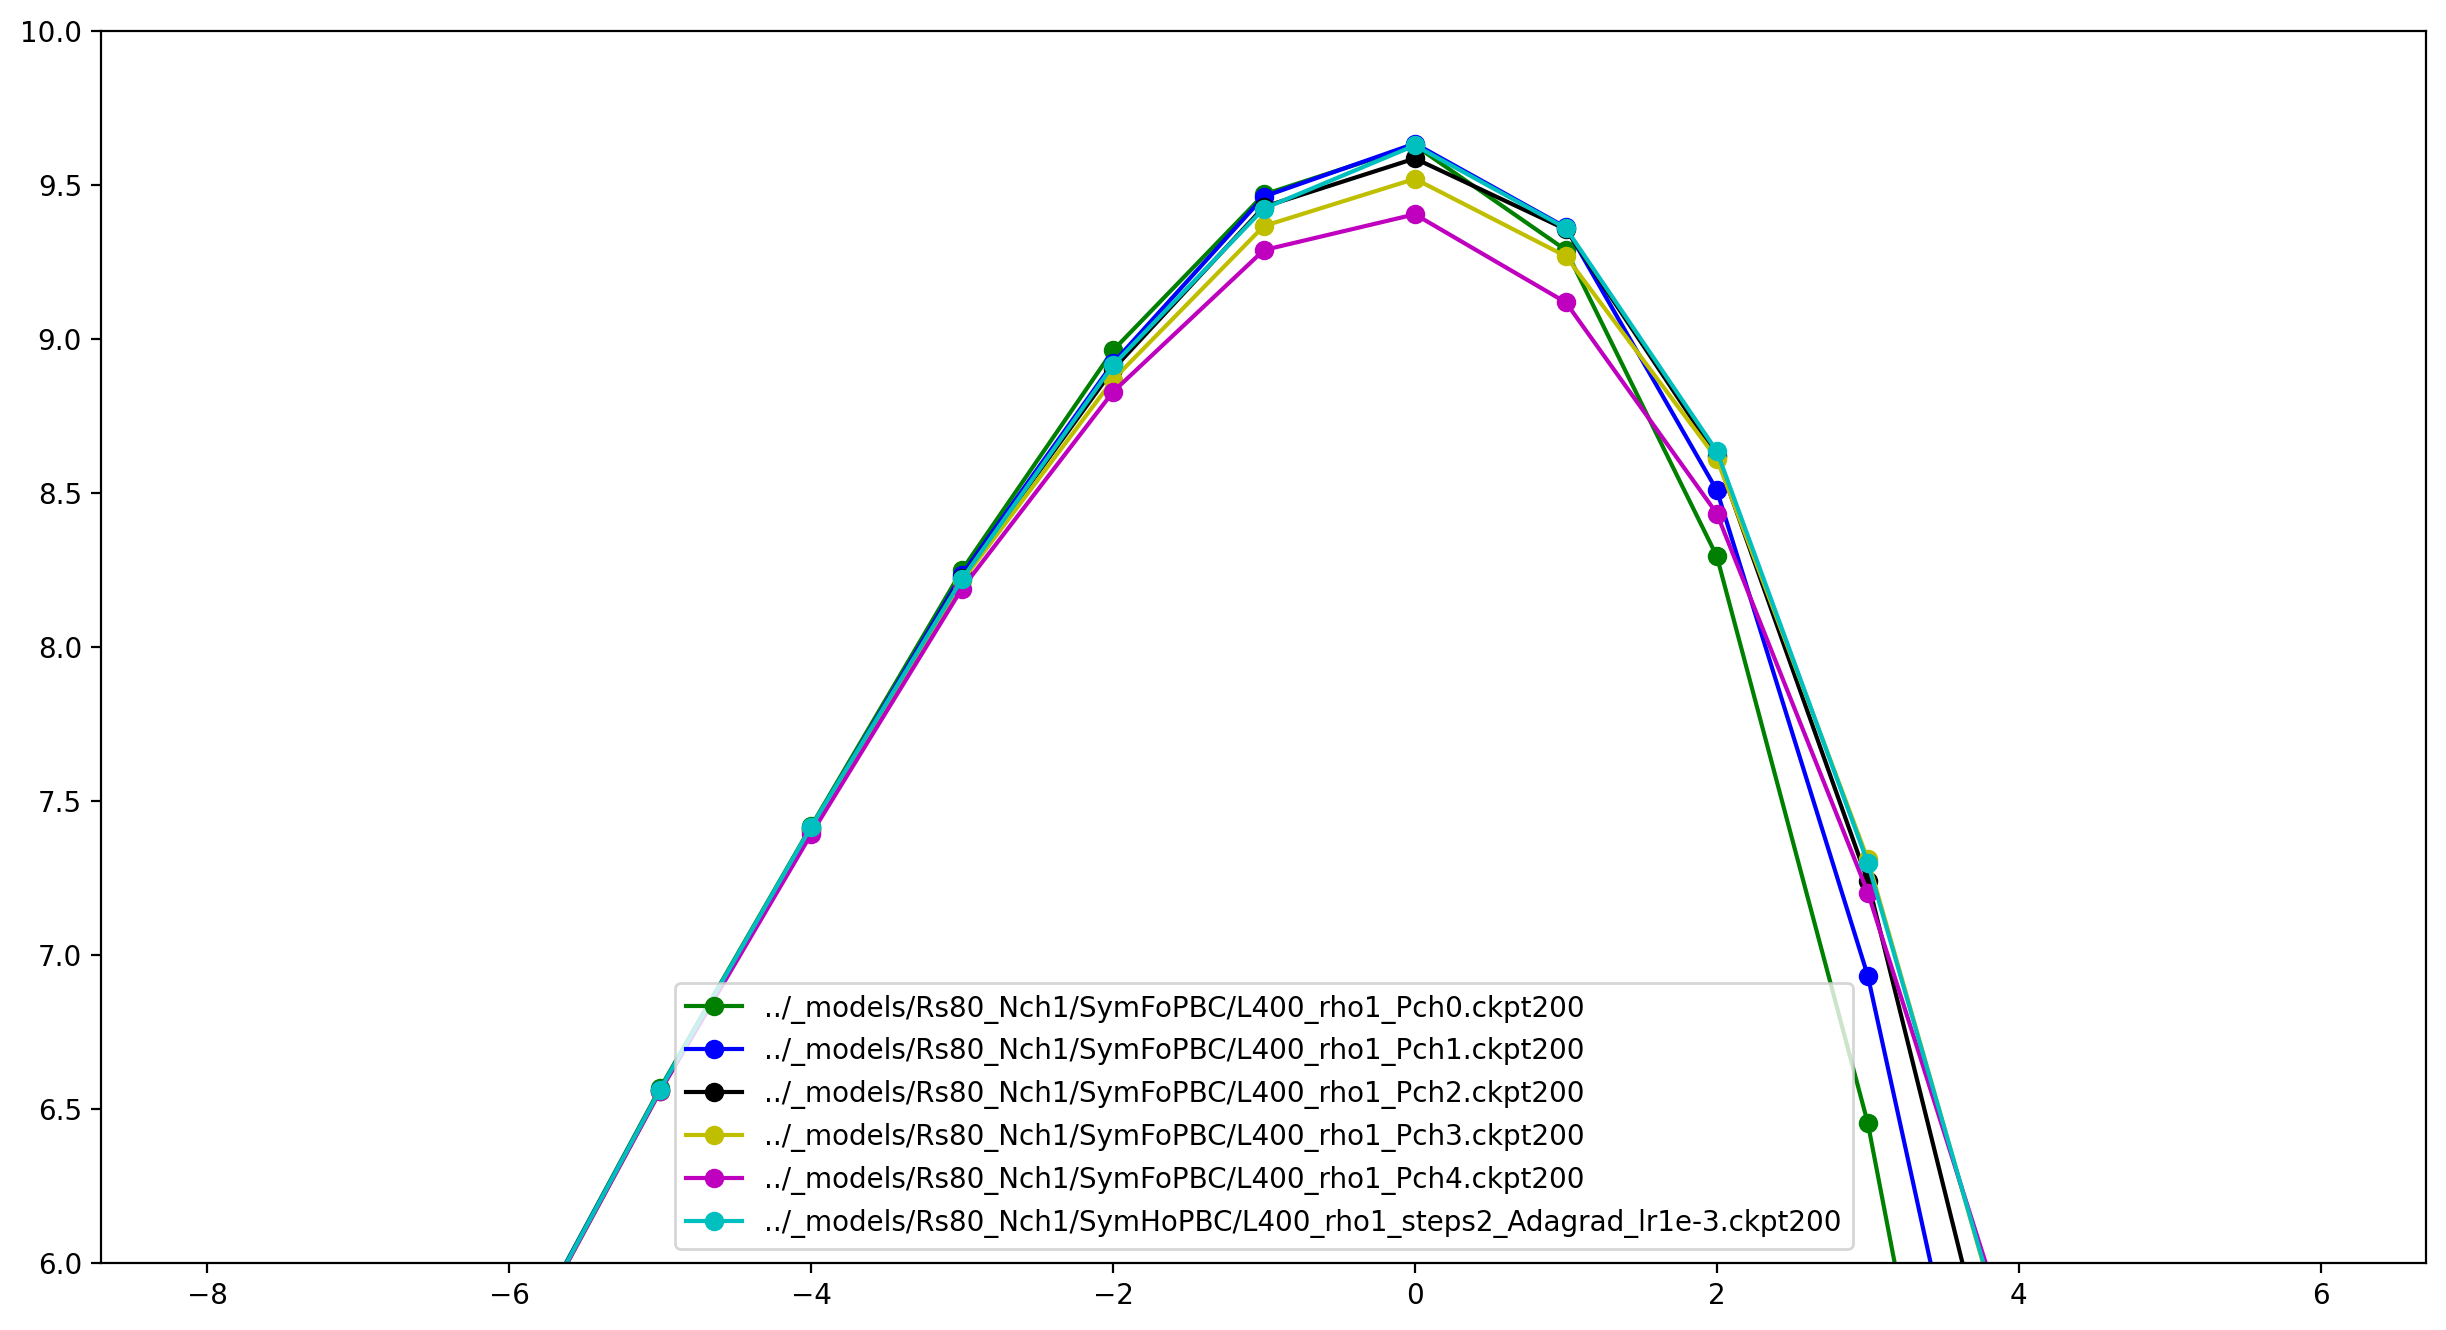

In [13]:
import torch, matplotlib.pyplot as plt
model_paths = [

    '../_models/Rs80_Nch1/SymFoPBC/L400_rho1_Pch0.ckpt200',
    '../_models/Rs80_Nch1/SymFoPBC/L400_rho1_Pch1.ckpt200',
    '../_models/Rs80_Nch1/SymFoPBC/L400_rho1_Pch2.ckpt200',
    '../_models/Rs80_Nch1/SymFoPBC/L400_rho1_Pch3.ckpt200',
    '../_models/Rs80_Nch1/SymFoPBC/L400_rho1_Pch4.ckpt200',

    '../_models/Rs80_Nch1/SymHoPBC/L400_rho1_steps2_Adagrad_lr1e-3.ckpt200'
]

plt.figure(figsize=(15,8), dpi=200)
for path in model_paths:
    dic = torch.load(path, map_location='cpu')
    plt.plot(P, dic['metric']['Qsq'], '-o', label=path)
plt.legend()
plt.ylim(6, 10)